In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle
import streamlit as st

In [ ]:
#loading data

df = pd.read_csv('/content/NetFlix.csv')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [ ]:
#Total columns

print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'description']


In [ ]:
#Shape of the dataset
df.shape

(7787, 12)

In [ ]:
# Description
df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [ ]:
# INformation about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [ ]:
# Checking duplicates
df.duplicated().sum()

0

**Exploratory Data Analysis**

<Figure size 2000x800 with 0 Axes>

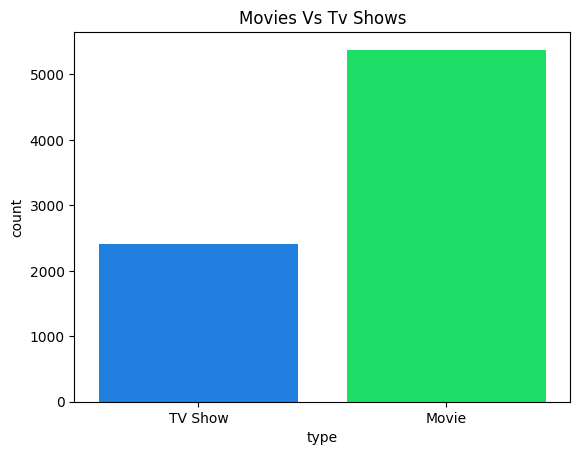

<Figure size 2000x800 with 0 Axes>

In [ ]:
#Count of movies and Tv shows

sns.countplot(x = 'type' ,data =df)
plt.title('Movies Vs Tv Shows')
plt.figure(figsize=(20,8))

Text(0.5, 1.0, 'Distribution of type')

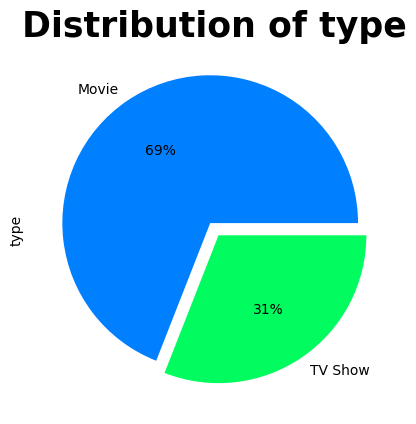

In [ ]:
# distribution of Movies and Tv shows

sns.set_palette('gist_ncar')
df.type.value_counts().plot(kind='pie',autopct='%1.0f%%',explode=(0.05,0.05))
plt.title('Distribution of type',fontsize=25,fontweight='bold')

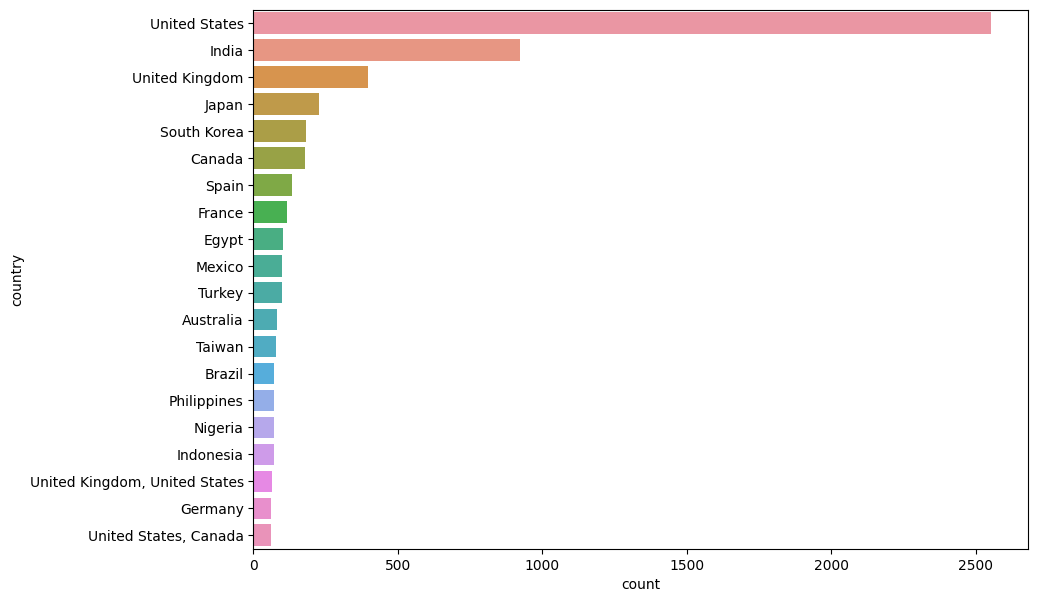

In [ ]:
# Checking the Countries that streaming movies 

plt.figure(figsize=(10,7))
sns.countplot(y=df['country'], order=df['country'].value_counts().index[0:20])
ax=plt.xticks(rotation = 0)

Text(0.5, 1.0, 'top 10 Directors of Netflix')

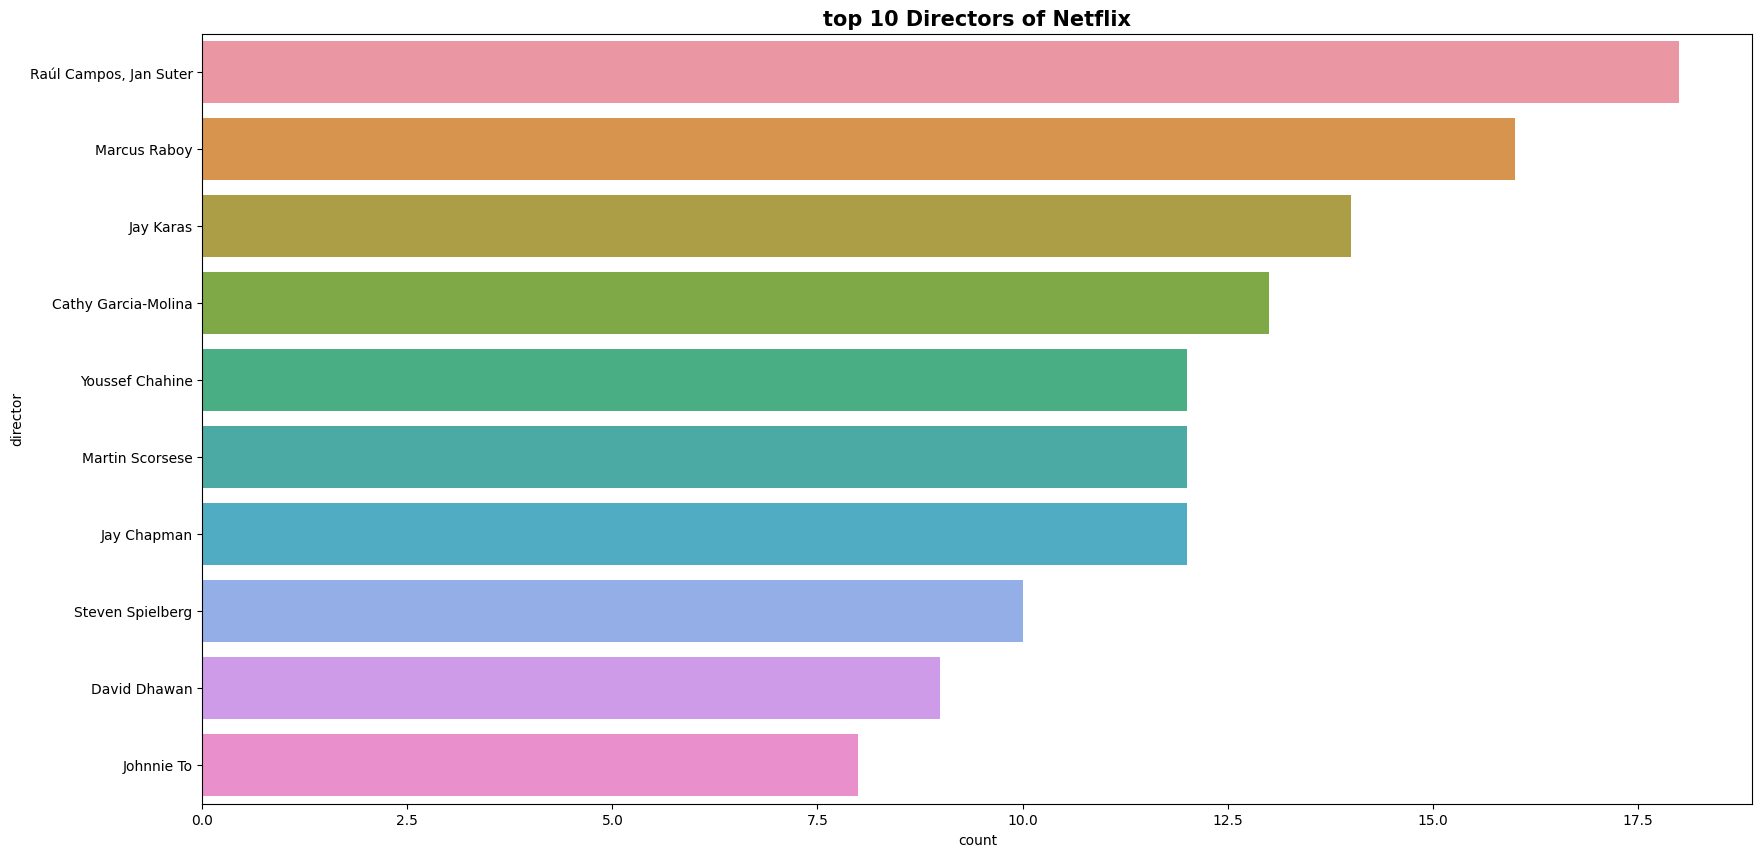

In [ ]:
# Top 10 directors 

plt.figure(figsize=(20,10))
graph=sns.countplot(y='director',data=df,order=df.director.value_counts().head(10).index)
graph.set_title("top 10 Directors of Netflix",fontsize=15,fontweight='bold')

In [ ]:
# Adding 2 more columns
 
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017.0,12.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,2019.0,1.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,2016.0,3.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,2018.0,12.0


In [ ]:
# Greater number of movies per year

df['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'movie_count'})

,year,movie_count
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


In [ ]:
#percentage of movies per year

graph=px.pie(df,names='year_added', height=500,width=900, hole=0.3, title='Netflix year distribution')
graph.show()

In [ ]:
# percentage of movies per month

graph=px.pie(df,names='month_added', height=500,width=900, hole=0.3, title='Netflix month distribution')
graph.show()

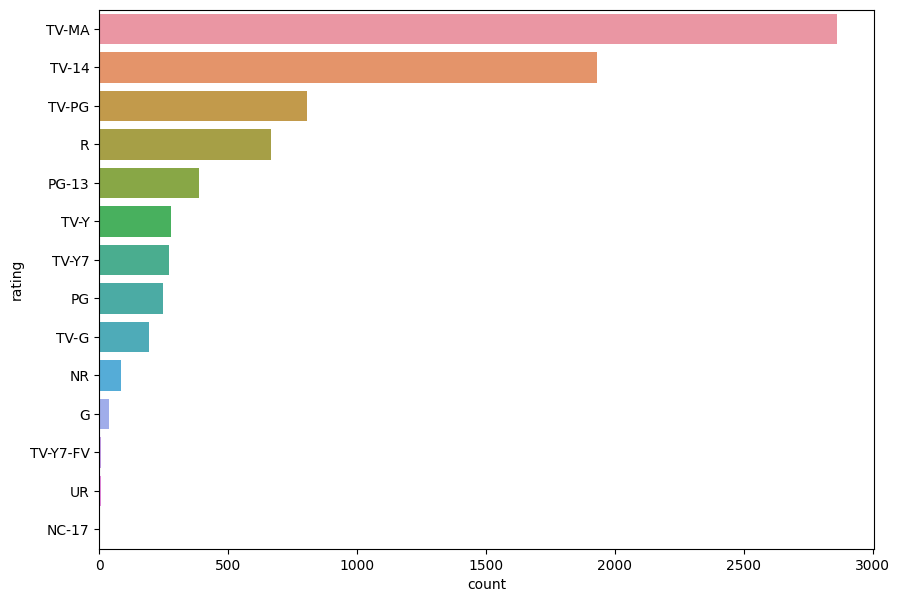

In [ ]:
# displaying ratings

plt.figure(figsize=(10,7))
ax=sns.countplot(y=df['rating'], order=df['rating'].value_counts().index[0:])

In [ ]:
#Display rating in percentage

graph=px.pie(df,names='rating', height=500,width=900, hole=0.3, title='Netflix rating distribution')
graph.show()

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


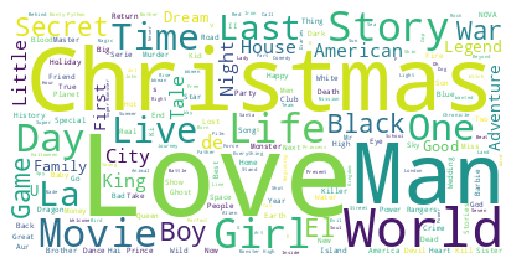

In [ ]:
# checking the most common and popular word that used in title

df_wc=df['title']
text=" ".join(i for i in df_wc)

stopwords=set(STOPWORDS)

wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(wordcloud,interpolation='nearest')
plt.axis('off')
plt.show()

**Preprocessing**

**Stemming**

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [ ]:
#Applying stemming for better understanding of description

df['description'] = df['description'].apply(Apply_stemming)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,2020.0,8.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",an architect and his wife move into a castl th...,2017.0,12.0
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",three indonesian women break record by becom t...,2019.0,1.0
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,new nfl star thad buy his old teammat belov fr...,2016.0,3.0
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV","this sequel to the award-win natur seri ""blue ...",2018.0,12.0


** Count Vectorization**

In [ ]:
# Count vectorization to convert text into numerical data

cv=CountVectorizer(max_features=8000,stop_words='english')

In [ ]:
cv

CountVectorizer(max_features=8000, stop_words='english')

In [ ]:
#merging important variables for easy process

df['tags']=df['description']+df['genres']

In [ ]:
tags = df['tags']

In [ ]:
tags

0       in a futur where the elit inhabit an island pa...
1       an architect and his wife move into a castl th...
2       three indonesian women break record by becom t...
3       new nfl star thad buy his old teammat belov fr...
4       this sequel to the award-win natur seri "blue ...
                              ...                        
7782    ten master artist turn up the heat in glassblo...
7783    determin to throw off the curs of be satan ill...
7784    determin to fall in love, 15-year-old adel is ...
7785    the high life lead to high anxieti for a fashi...
7786    two former high school sweetheart unexpect reu...
Name: tags, Length: 7787, dtype: object

In [ ]:
vector=cv.fit_transform(df['tags'].values.astype('U')).toarray()

In [ ]:
vector.shape

(7787, 8000)

**Cosine Similarity**

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
new_df = df.drop(columns=['description', 'genres'])

In [ ]:
new_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,year_added,month_added,tags
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,2020.0,8.0,in a futur where the elit inhabit an island pa...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,2017.0,12.0,an architect and his wife move into a castl th...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,2019.0,1.0,three indonesian women break record by becom t...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,2016.0,3.0,new nfl star thad buy his old teammat belov fr...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,2018.0,12.0,"this sequel to the award-win natur seri ""blue ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,2019-07-12,2019,TV-14,1,2019.0,7.0,ten master artist turn up the heat in glassblo...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,2020-09-01,2017,TV-MA,2,2020.0,9.0,determin to throw off the curs of be satan ill...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",2016-08-26,2013,NC-17,180,2016.0,8.0,"determin to fall in love, 15-year-old adel is ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,2019-03-08,2013,PG-13,98,2019.0,3.0,the high life lead to high anxieti for a fashi...


In [ ]:
#function for recommending movies

def recommend(movie): 
  movie_index = df[df['title']==movie].index[0]
  distance = similarity[movie_index]
  movie_list = sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])[1:6]

  for i in movie_list:
    print(df.iloc[i[0]].title)

In [ ]:
#checking if that function works

recommend("3 Heroines")

Sparring
Dangal
Azhar
Ladies First
Summer of '92


**Sentiment Analysis**

In [ ]:
#scaping data from google

movie_reviews = []
url = 'https://www.google.com/search?q=movie+reviews+avengers+endgame'

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
for review in soup.find_all('div', {'class': 'b1hJbf'}):
    movie_reviews.append(review.get_text())

In [ ]:
#processing of removing punctuations and stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuations = set(punctuation)

def preprocess_text(text):
    text = text.lower()

 # Tokenization 

    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    text = preprocessed_text(' '.join(tokens))
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#giving sentiment to labels

labels =['positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive']

In [ ]:
df = pd.DataFrame({'review':text, 'sentiment': labels})

In [ ]:
#Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
#Vectorization

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Naive Bayes **

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5


In [ ]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(lowercase=True, stop_words='english', strip_accents='unicode')),
    ('classifier', MultinomialNB())
])

In [ ]:
scores = cross_val_score(pipeline, df['review'], df['sentiment'], cv=3)

In [ ]:
print(scores)

[0.5        0.66666667 0.66666667]


**K Nearest Neighbors**


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
knn.fit(X_train_vec, y_train)

# Predict the sentiment of the test data
y_pred = knn.predict(X_test_vec)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5


deployment

In [ ]:
# Serializing

pickle.dump(new_df,open('df.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
new_df['title'].values

array(['3%', '1920', '3 Heroines', ..., 'Blue Is the Warmest Color',
       'Blue Jasmine', 'Blue Jay'], dtype=object)

In [ ]:
new_df.to_dict()

{'show_id': {0: 's1',
  1: 's10',
  2: 's100',
  3: 's1000',
  4: 's1001',
  5: 's1002',
  6: 's1003',
  7: 's1004',
  8: 's1005',
  9: 's1006',
  10: 's1007',
  11: 's1008',
  12: 's1009',
  13: 's101',
  14: 's1010',
  15: 's1011',
  16: 's1012',
  17: 's1013',
  18: 's1014',
  19: 's1015',
  20: 's1016',
  21: 's1017',
  22: 's1018',
  23: 's1019',
  24: 's102',
  25: 's1020',
  26: 's1021',
  27: 's1022',
  28: 's1023',
  29: 's1024',
  30: 's1025',
  31: 's1026',
  32: 's1027',
  33: 's1028',
  34: 's1029',
  35: 's103',
  36: 's1030',
  37: 's1031',
  38: 's1032',
  39: 's1033',
  40: 's1034',
  41: 's1035',
  42: 's1036',
  43: 's1037',
  44: 's1038',
  45: 's1039',
  46: 's104',
  47: 's1040',
  48: 's1041',
  49: 's1042',
  50: 's1043',
  51: 's1044',
  52: 's1045',
  53: 's1046',
  54: 's1047',
  55: 's1048',
  56: 's1049',
  57: 's105',
  58: 's1050',
  59: 's1051',
  60: 's1052',
  61: 's1053',
  62: 's1054',
  63: 's1055',
  64: 's1056',
  65: 's1057',
  66: 's1058',
  67:

In [ ]:
pickle.dump(new_df.to_dict(), open('df_dict.pkl','wb'))

In [ ]:
# Installing Streamlit

!pip install -q streamlit

In [ ]:
#Funtion that are passing to Streamlit to recommend movies

for col in df.columns:
    print(col)
for col in new_df.columns:
    print(col)
print('D')
def recommend(movie): 
  print(df)
  movie_index = new_df[new_df['title']==movie].index[0]
  distance = similarity[movie_index]
  movie_list = sorted(list(enumerate(distance)),reverse=True, key=lambda x:x[1])[1:6]
  recommended_movies = []
  for i in movie_list:
    recommended_movies.append(new_df.iloc[i[0]].title)
  return recommended_movies

df_dict = pickle.load(open('df_dict.pkl','rb'))
tags = pd.DataFrame(df_dict)

similarity = pickle.load(open('similarity.pkl','rb'))

st.title('Netflix Recommendation system')

option= st.selectbox('select your movie:', tags['title'].values)

if st.button('Similar movies'):
  recommendations = recommend(option)
  for i in recommendations:
    st.write(i)

Writing file_py.ipynb


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.372s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/file_py.ipynb &>/content/logs.txt &

In [ ]:
# Access using this local host link

!npx localtunnel --port 8501

npx: installed 22 in 1.351s
your url is: https://tall-lines-grab.loca.lt
